## 1. Import Dataset

Mental Health in Tech Survey 
https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [73]:
# TODO: Import data set
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
mh_df = pd.read_csv("./data/survey.csv")
mh_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [74]:
# Check the nubmer of rows and columns
mh_df.shape

(1259, 27)

In [75]:
# Check the data types
mh_df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [76]:
# Change some column names
mh_df.rename(columns={"Timestamp":"timestamp", "Age": "age", "Gender": "gender", "Country": "country"}, inplace=True)
mh_df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## 2. Data cleaning

1) Change Gender values

In [77]:
# TODO: Cleaning: Male, female string matching
# Check Gender values
gender = mh_df["gender"].value_counts()
print(gender)

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [78]:
# Change Gender names -> Male/Female/Others
non_binary = ['A little about you', 'Agender', 'All', 'Androgyne','Enby',
          'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^','Male-ish',
          'Nah', 'Neuter', 'Trans woman', 'Trans-female','fluid',
          'male leaning androgynous','non-binary',
          'ostensibly male, unsure what that really means', 'p', 
          'queer','queer/she/they', 'something kinda male?']
female = ['Cis Female','F', 'Femake', 'Female', 'Female ',
          'Female (cis)','Woman','cis-female/femme', 'f', 
          'femail', 'female','woman']
male = ['Cis Male','Cis Man','M','Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)',
       'Malr', 'Man','cis male','m','maile', 'male','msle']

# Replace gender values with Male/Female/Others
mh_df.loc[mh_df["gender"].isin(non_binary)==True, "new_gender"] = "Non Binary"
mh_df.loc[mh_df["gender"].isin(female)==True, "new_gender"] = "Female"
mh_df.loc[mh_df["gender"].isin(male)==True, "new_gender"] = "Male"

print(mh_df["new_gender"].value_counts())

# Drop the original"gender" row
mh_df = mh_df.drop("gender", axis=1)

# Change the column name to "gender"
mh_df.rename(columns={"new_gender":"gender"}, inplace=True)

mh_df.head()

Male          990
Female        247
Non Binary     22
Name: new_gender, dtype: int64


,timestamp,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,gender
0,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Female
1,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,Male
2,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Male
3,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Male
4,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,Male


2) Check "age" values

In [79]:
print("=====Before Cleaning=====")
print(mh_df["age"].describe())
print(mh_df["age"].unique())

# Check the number of rows with negative or too small age values
num_negative_ages = (mh_df["age"]<12).sum()
print(f"The number of rows with negative or too small age values is {num_negative_ages}.")
      
# Check the number of rows with >120 age values
num_over_ages = (mh_df["age"]>120).sum()
print(f"The number of rows with >120 age values is {num_over_ages}.")

# Drop the rows with negative or >120 age values 
mh_df = mh_df[(mh_df["age"] >= 12)&(mh_df["age"]<=120)]
print("\n")
print("=====After Cleaning=====")
print(mh_df["age"].describe())
print(mh_df["age"].unique())
# -> The age values range from 18 to 72

=====Before Cleaning=====
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: age, dtype: float64
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
The number of rows with negative or too small age values is 6.
The number of rows with >120 age values is 2.


=====After Clea

Text(0.5, 0, 'Age')

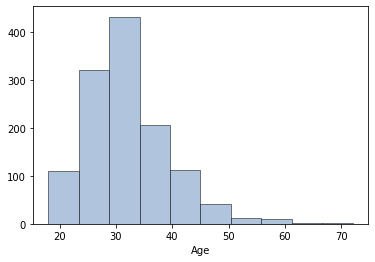

In [80]:
# Check the age distribution in this dataset
plt.hist(mh_df["age"], color="lightsteelblue",
         edgecolor="black",linewidth=0.5)
plt.xlabel("Age")

3) Handle missing values

In [81]:
# TODO: Cleaning: Handle missing values
# Check the number of missing values in each column
mh_df.isnull().sum()

timestamp                       0
age                             0
country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
gender                          0
dtype: int64

In [82]:
# Replace missing values with "No Answer"
mh_df = mh_df.fillna({"self_employed":"No Answer", "work_interfere":"No Answer", "comments":"No Answer"})
print("===== self_employed =====")
print(mh_df["self_employed"].unique())

print("\n")
print("===== work_interfere =====")
print(mh_df["work_interfere"].unique())

===== self_employed =====
['No Answer' 'Yes' 'No']


===== work_interfere =====
['Often' 'Rarely' 'Never' 'Sometimes' 'No Answer']


In [83]:
# Change the name of "work_interfere" values
mh_df = mh_df.replace({"work_interfere":{"Often":"1_Often", "Sometimes":"2_Sometimes", 
                                "Rarely":"3_Rarely", "Never":"4_Never", "No Answer":"5_No Answer"}})  
print(mh_df["work_interfere"].unique())

['1_Often' '3_Rarely' '4_Never' '2_Sometimes' '5_No Answer']


In [84]:
# Change the name of "mental_health_consequence" values
mh_df = mh_df.replace({"mental_health_consequence":{"No":"0_No", "Maybe":"1_Maybe", "Yes": "2_Yes"}})
print(mh_df["mental_health_consequence"].unique())

['0_No' '1_Maybe' '2_Yes']


## 3. Distribution of target variables and key features

In [85]:
# TODO: Distribution of the target variable
# Distribution of "treatment" ("Have you sought treatment for a mental health condition?")
print("===== treatment =====")
print(mh_df["treatment"].value_counts())
print("\n")
# Distribution of "work_interfere" ("If you have a mental health condition, do you feel that it interferes with your work?")
print("===== work_interfere =====")
print(mh_df["work_interfere"].value_counts().sort_index())


===== treatment =====
Yes    632
No     619
Name: treatment, dtype: int64


===== work_interfere =====
1_Often        140
2_Sometimes    464
3_Rarely       173
4_Never        212
5_No Answer    262
Name: work_interfere, dtype: int64


Yes    632
No     619
Name: treatment, dtype: int64


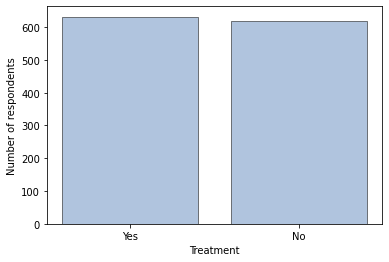

In [86]:
treatment = mh_df["treatment"].value_counts()
print(treatment)
plt.bar(treatment.index, treatment.values, color="lightsteelblue",
       edgecolor="black",linewidth=0.5)
plt.xlabel("Treatment")
plt.ylabel("Number of respondents")
plt.show()

- This dataset has no information on whether each respondent currently has a mental health issue or not. (The variable "treatment" indicates whether workers have sought treatment for a mental health condition or not. It does not tell about the current health condition.)

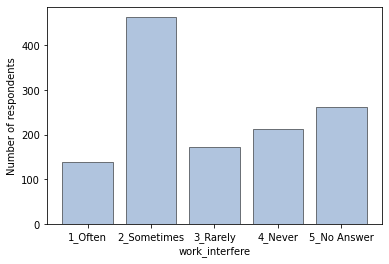

In [87]:
work_interfere = mh_df["work_interfere"].value_counts().sort_index()
plt.bar(work_interfere.index, work_interfere.values, color="lightsteelblue",
       edgecolor="black",linewidth=0.5)
plt.xlabel("work_interfere")
plt.ylabel("Number of respondents")
plt.show()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64


Yes    1025
No      226
Name: tech_company, dtype: int64

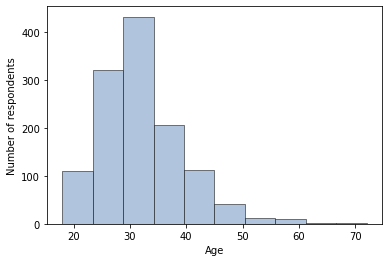

In [88]:
# Check age and gender distribution
# Check the age distribution in this dataset
plt.hist(mh_df["age"], color="lightsteelblue",
         edgecolor="black",linewidth=0.5)
plt.xlabel("Age")
plt.ylabel("Number of respondents")
print(mh_df["age"].describe())

mh_df["tech_company"].value_counts()

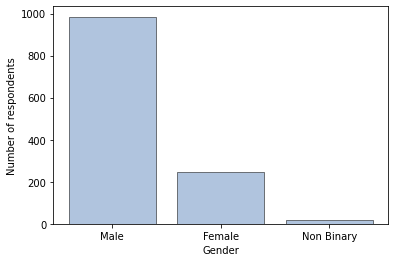

Male          985
Female        247
Non Binary     19
Name: gender, dtype: int64


In [89]:
# Gender distribution
gender = mh_df["gender"].value_counts()

plt.bar(gender.index, gender.values, color="lightsteelblue",
       edgecolor="black",linewidth=0.5)
plt.xlabel("Gender")
plt.ylabel("Number of respondents")
plt.show()

print(mh_df["gender"].value_counts())

[32.0, 30.0, 28.0]

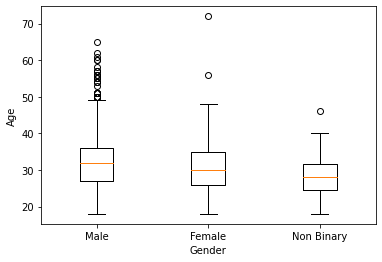

In [90]:
male_age = mh_df[mh_df["gender"] == "Male"]["age"]
female_age = mh_df[mh_df["gender"] == "Female"]["age"]
nonbinary_age = mh_df[mh_df["gender"] == "Non Binary"]["age"]

plt.boxplot([male_age, female_age, nonbinary_age], labels = ["Male", "Female", "Non Binary"])
plt.xlabel("Gender")
plt.ylabel("Age")

[male_age.median(), female_age.median(), nonbinary_age.median()]


## 4. Relationship between the target variable and the other features

==Age distributino of treat_yes==
count    632.000000
mean      32.607595
std        7.558193
min       18.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       72.000000
Name: age, dtype: float64


==Age distributino of treat_no==
count    619.000000
mean      31.534733
std        6.966401
min       18.000000
25%       27.000000
50%       31.000000
75%       35.000000
max       65.000000
Name: age, dtype: float64


Text(0, 0.5, 'Age')

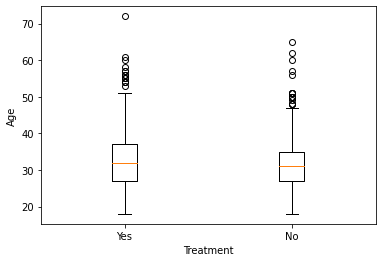

In [91]:
# Relationship between "treatment" and "age"
treat_yes = mh_df[mh_df["treatment"] == "Yes"]["age"]
treat_no = mh_df[mh_df["treatment"] == "No"]["age"]

print("==Age distributino of treat_yes==")
print(treat_yes.describe())
print("\n")
print("==Age distributino of treat_no==")
print(treat_no.describe())

plt.boxplot([treat_yes,treat_no], labels = ["Yes", "No"])
plt.xlabel("Treatment")
plt.ylabel("Age")

In [92]:
# Define a function creating a bar chart (relationship between "treatment" and one features)  
def relation_bar_chart(df, feature_name, label_name):
    graph = mh_df.groupby(feature_name)[label_name].value_counts().sort_index()
    graph.unstack().plot.bar(color=["lightsteelblue","salmon"],
                                     edgecolor="black",linewidth=0.5)

Male          985
Female        247
Non Binary     19
Name: gender, dtype: int64


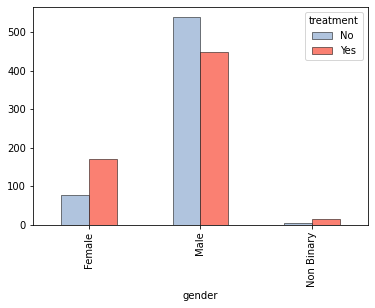

In [93]:
# Relationship between "treatment" and "gender"
print(mh_df["gender"].value_counts())

relation_bar_chart(mh_df, "gender", "treatment")

- Mental health issues are more common among "Female" and "Non Binary" than "Male". 

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64


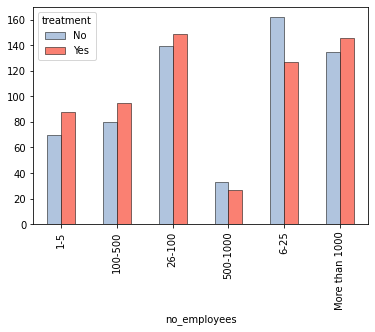

In [94]:
# Relationship company size (number of employees) and treatment
print(mh_df["no_employees"].value_counts())

relation_bar_chart(mh_df, "no_employees", "treatment")

- There seems no relationship between company size and "treatment"

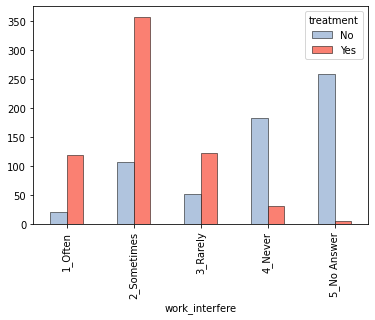

In [95]:
# Relationship between "treatment" and "work_interfere"
int_and_treatment = mh_df.groupby("work_interfere")["treatment"].value_counts().sort_index()

relation_bar_chart(mh_df, "work_interfere", "treatment")

Research question1:  
- Employees who are willing to share mental health problems with others are less likely to have productivity issues in their workplace. 
    Willingness to share the issues: "coworkers", "supervisor"
    Workplace issue: "work_interfere"

In [96]:
# Define a function creating a stacked bar chart
def create_bar_chart(feature, label):
    # Create a 2x2 table with a feature and a label
    cross = pd.crosstab(feature,label,normalize="index")
     
    # Designate colors
    cmap = plt.get_cmap("Blues")
    colors = []
    for i in range(len(label.unique())):
        colors += [cmap(i/(len(label.unique())))]
        i += 1
    
    # Plot a stacked bar chart
    cross.plot.bar(stacked=True, color=colors, edgecolor="black",linewidth=0.5)    
    
    plt.ylabel("Proportion of respondents")
    plt.legend(title=label.name,bbox_to_anchor=(1.05, 1), fontsize=9)

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64


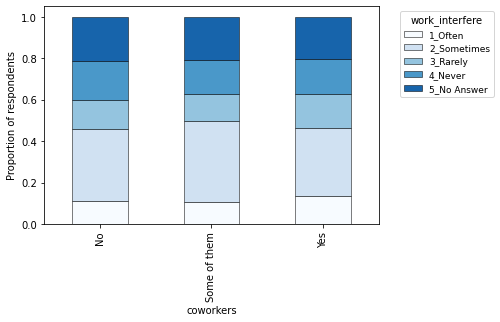

In [97]:
# Relationship between "coworkers" and "work_interfere"
print(mh_df["coworkers"].value_counts())
create_bar_chart(mh_df["coworkers"],mh_df["work_interfere"])

- There seems no relationship between "work_interfere" and employees' willingness to discuss a mental health issue

2_Sometimes    357
3_Rarely       122
1_Often        119
4_Never         30
5_No Answer      4
Name: work_interfere, dtype: int64


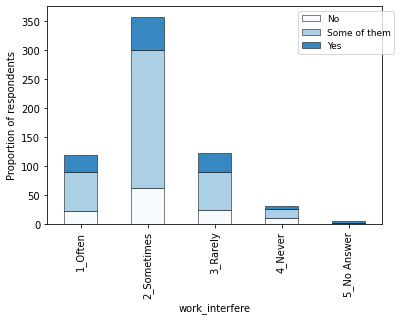

In [98]:
# Relationship between "coworkers" and "work_interfere" - only employees with treatment experience
# Create a subset
sub_mh_df = mh_df[mh_df["treatment"]=="Yes"]

print(sub_mh_df["work_interfere"].value_counts())

cross = pd.crosstab(sub_mh_df["work_interfere"],sub_mh_df["coworkers"])
     
# Designate colors
cmap = plt.get_cmap("Blues")
colors = []
for i in range(len(sub_mh_df["coworkers"].unique())):
    colors += [cmap(i/(len(sub_mh_df["coworkers"].unique())))]
    i += 1
    
# Plot a stacked bar chart
cross.plot.bar(stacked=True, color=colors, edgecolor="black",linewidth=0.5)    
plt.ylabel("Proportion of respondents")
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=9)


In [99]:
cross = pd.crosstab(sub_mh_df["work_interfere"],sub_mh_df["coworkers"])
cross

coworkers,No,Some of them,Yes
work_interfere,,,
1_Often,22,68,29
2_Sometimes,61,238,58
3_Rarely,23,67,32
4_Never,10,15,5
5_No Answer,1,1,2


- Employees who have treatment experience and willingness to discuss with their coworkers are less likely to feel work interference.

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64


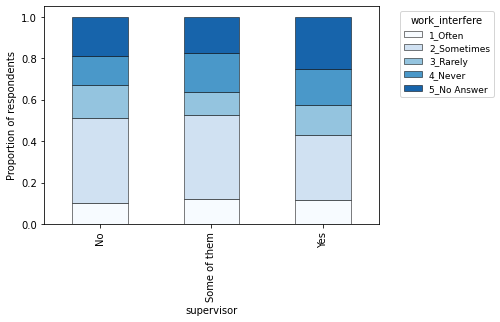

In [100]:
# Relationship between "supervisor" and "work_interfere" 
print(mh_df["supervisor"].value_counts())

create_bar_chart(mh_df["supervisor"],mh_df["work_interfere"])

- Employees who are willing to discuss with their supervisor are less likely to feel work interference.

Yes             248
No              204
Some of them    180
Name: supervisor, dtype: int64


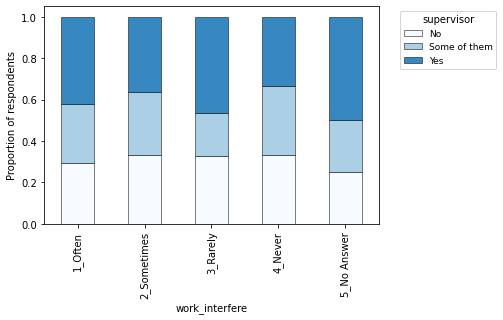

In [101]:
# Relationship between "supervisor" and "work_interfere" - only employees with treatment experience
print(sub_mh_df["supervisor"].value_counts())

create_bar_chart(sub_mh_df["work_interfere"],sub_mh_df["supervisor"])

- Employees who have treatment experience and willingness to discuss with their supervisor are less likely to feel work interference.

Yes    632
No     619
Name: treatment, dtype: int64


coworkers,No,Some of them,Yes
treatment,,,
No,141,382,96
Yes,117,389,126


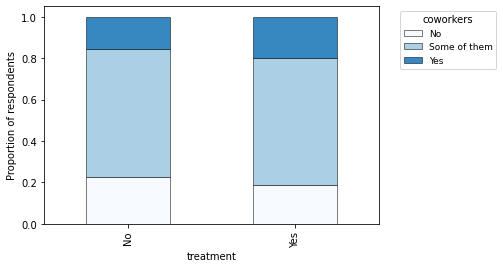

In [102]:
# Relationship between "coworkers" and "treatment"
create_bar_chart(mh_df["treatment"],mh_df["coworkers"])

print(mh_df["treatment"].value_counts())

pd.crosstab(mh_df["treatment"],mh_df["coworkers"])

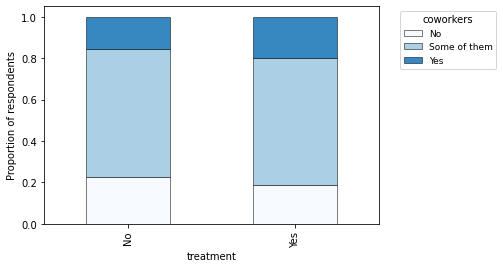

In [103]:
# Relationship between "supervisor" and "treatment" 
create_bar_chart(mh_df["treatment"],mh_df["coworkers"])

Research question 1 - Results: 

Employees who are more willing to discuss their mental health issues with others are less likely to feel work interference. Promoting social interactions in workplaces may prevent employees with mental health issues from losing their productivity.

Research question 2:
- Does support from employers create a working environment where employees with a mental health issue can work comfortably? 
    Employer's support: "benefits", "care_options", "wellness_program", "seek_help", "mentalvsphysical", ("mentalhealthconsequence")
    Working condition: "work_interfere", "obs_consequence"

Yes           302
No            179
Don't know    151
Name: benefits, dtype: int64


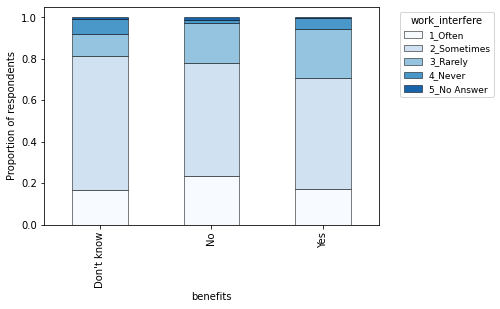

In [104]:
# Relationship between "benefits" and "work_interfere" - only employees with treatment experience
print(sub_mh_df["benefits"].value_counts())
create_bar_chart(sub_mh_df["benefits"],sub_mh_df["work_interfere"])

- Employees who have treatment experience and whose employer provides mental health benefits are slightly less likely to experience work interference. However, there are still over 60% of employees experience work interference.

No            320
Don't know    166
Yes           146
Name: seek_help, dtype: int64


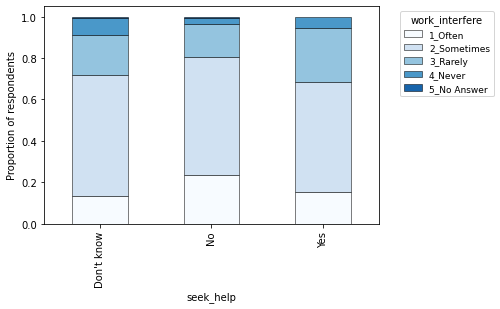

In [105]:
# Relationship between "seek_help" and "work_interfere" - only employees with treatment experience
print(sub_mh_df["seek_help"].value_counts())
create_bar_chart(sub_mh_df["seek_help"],sub_mh_df["work_interfere"])

- Employees who have treatment experience and whose employer provides mental health-related resources are less likely to experience work interference. However, there are still over 60% of employees experience work interference.  

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64


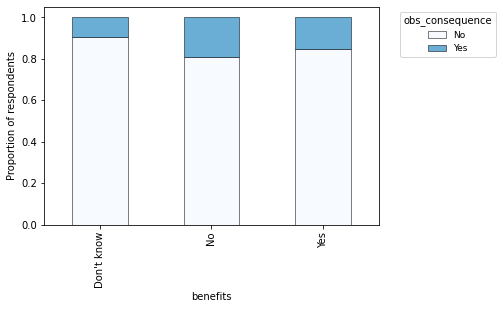

In [106]:
# Relationship between "benefits" and "obs_consequence" 
# obs_consequence: "Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"
print(mh_df["benefits"].value_counts())
create_bar_chart(mh_df["benefits"],mh_df["obs_consequence"])

Explore more the relationship between social interaction and mental health issues 

1_Maybe    252
0_No       210
2_Yes      170
Name: mental_health_consequence, dtype: int64


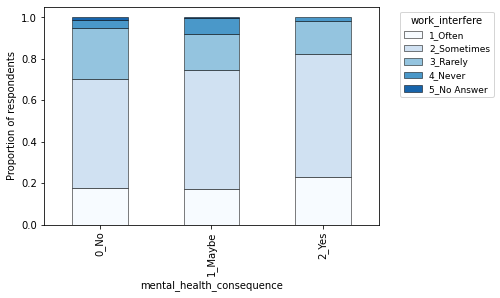

In [107]:
# Relationship between "mental_health_consequence" and "work_interfere" - only employees with treatment experience
# "mental_health_consequence": Do you think that discussing a mental health issue with your employer would have negative consequences?
print(sub_mh_df["mental_health_consequence"].value_counts())
create_bar_chart(sub_mh_df["mental_health_consequence"],sub_mh_df["work_interfere"])

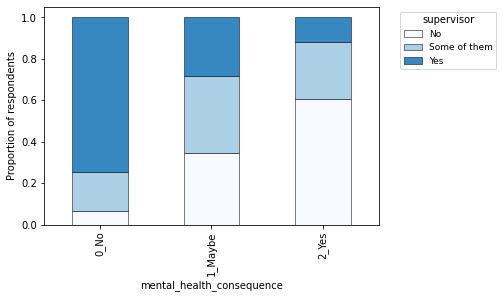

In [108]:
# Relationship between "mental_health_consequence" and "supervisor" - only employees with treatment experience
# "mental_health_consequence": Do you think that discussing a mental health issue with your employer would have negative consequences?
create_bar_chart(sub_mh_df["mental_health_consequence"],sub_mh_df["supervisor"])

coworkers,No,Some of them,Yes
mental_health_consequence,,,
0_No,12,108,90
1_Maybe,34,189,29
2_Yes,71,92,7


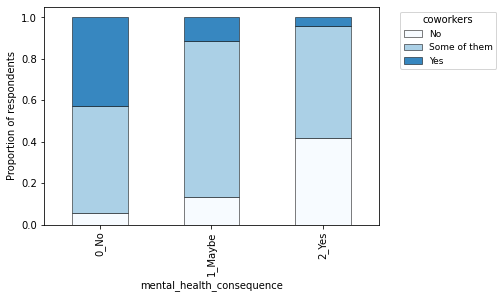

In [109]:
# Relationship between "mental_health_consequence" and "coworkers" - only employees with treatment experience
# "mental_health_consequence": Do you think that discussing a mental health issue with your employer would have negative consequences?
create_bar_chart(sub_mh_df["mental_health_consequence"],sub_mh_df["coworkers"])

pd.crosstab(sub_mh_df["mental_health_consequence"],sub_mh_df["coworkers"])

In [110]:
print(sub_mh_df["no_employees"].value_counts())
print("\n")

# Recategorize no_employee
small = ["1-5", "6-25", "26-100"]
medium = ["100-500", "500-1000"]
big = ["More than 1000"]

mh_df.loc[mh_df["no_employees"].isin(small)==True, "company_size"] = "Small"
mh_df.loc[mh_df["no_employees"].isin(medium)==True, "company_size"] = "Medium"
mh_df.loc[mh_df["no_employees"].isin(big)==True, "company_size"] = "Big"

print("the whole dataset")
print(mh_df["company_size"].value_counts())
print("\n")

sub_mh_df = mh_df[mh_df["treatment"]=="Yes"]
print("treatment == Yes")
print(sub_mh_df["company_size"].value_counts())

26-100            149
More than 1000    146
6-25              127
100-500            95
1-5                88
500-1000           27
Name: no_employees, dtype: int64


the whole dataset
Small     735
Big       281
Medium    235
Name: company_size, dtype: int64


treatment == Yes
Small     364
Big       146
Medium    122
Name: company_size, dtype: int64


mental_health_consequence,0_No,1_Maybe,2_Yes
company_size,,,
Big,35,61,50
Medium,35,55,32
Small,140,136,88


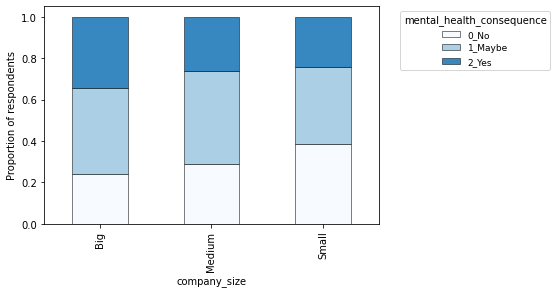

In [111]:
# Relationship between "mental_health_consequence" and "company size" - only employees with treatment experience
# "mental_health_consequence": Do you think that discussing a mental health issue with your employer would have negative consequences?
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["mental_health_consequence"])

pd.crosstab(sub_mh_df["company_size"],sub_mh_df["mental_health_consequence"])

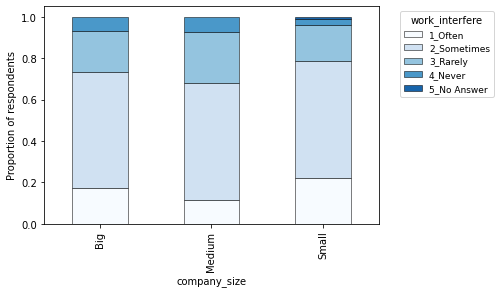

In [112]:
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["work_interfere"])

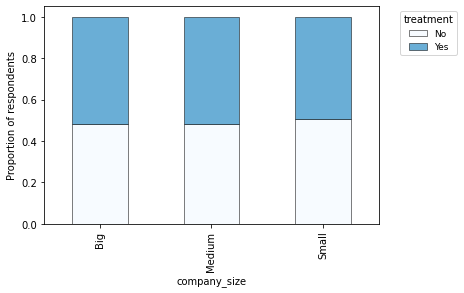

In [113]:
create_bar_chart(mh_df["company_size"],mh_df["treatment"])

Employees in big companies are more likely to be afraid of negative consequences of discussing mental health issues with their employer. 

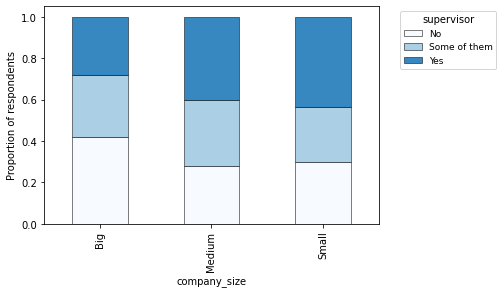

In [114]:
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["supervisor"])

Employees in big companies are less willing to discuss their mental health issues with their supervisor.

coworkers,No,Some of them,Yes
company_size,,,
Big,46,78,22
Medium,20,84,18
Small,51,227,86


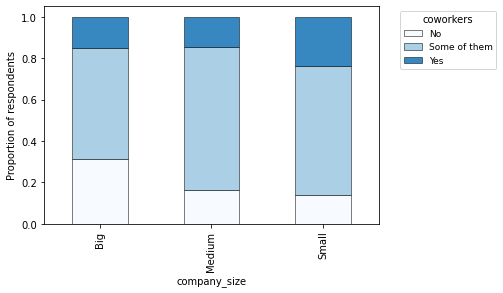

In [115]:
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["coworkers"])

pd.crosstab(sub_mh_df["company_size"],sub_mh_df["coworkers"])

Employees in big companies are less willing to discuss their mental health issues with their coworkers.

benefits,Don't know,No,Yes
company_size,,,
Big,27,10,109
Medium,31,18,73
Small,93,151,120


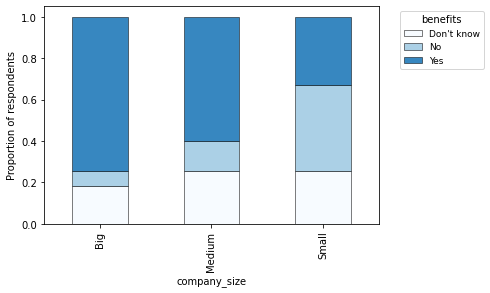

In [116]:
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["benefits"])

pd.crosstab(sub_mh_df["company_size"],sub_mh_df["benefits"])

Yes           109
Don't know     27
No             10
Name: benefits, dtype: int64


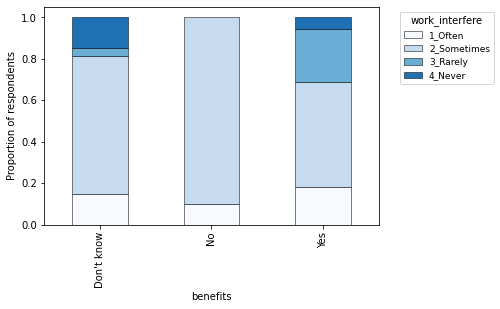

In [117]:
# Relationship between "benefits" and "work_interfere" - only employees with treatment experience and big companies
big_mh_df = sub_mh_df[sub_mh_df["company_size"]=="Big"]

print(big_mh_df["benefits"].value_counts())
create_bar_chart(big_mh_df["benefits"],big_mh_df["work_interfere"])

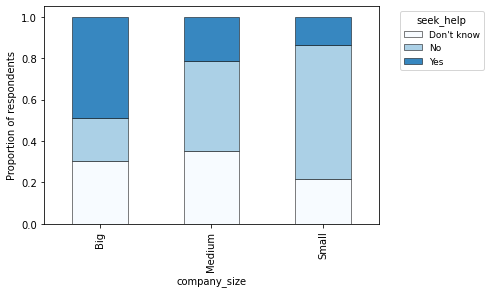

In [118]:
create_bar_chart(sub_mh_df["company_size"],sub_mh_df["seek_help"])

Logistic regression (test)

In [119]:
# Preprare dataset for logistic regression
lr_df = sub_mh_df[["age", "gender", "self_employed", "company_size", 
                    "benefits","coworkers","supervisor","mental_health_consequence",
                   "mental_vs_physical","obs_consequence"]]

y = lr_df["obs_consequence"]
X = lr_df[lr_df.columns[lr_df.columns != "obs_consequence"]]

X = pd.get_dummies(X, drop_first=True)
X.head()

,age,gender_Male,gender_Non Binary,self_employed_No Answer,self_employed_Yes,company_size_Medium,company_size_Small,benefits_No,benefits_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_consequence_1_Maybe,mental_health_consequence_2_Yes,mental_vs_physical_No,mental_vs_physical_Yes
0,37,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1
3,31,1,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0
6,35,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
8,42,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0
10,31,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0


In [120]:
# Split the data into 80% training data and 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check each data size
print(X_train.shape)
print(X_test.shape)

# Build a logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

(505, 17)
(127, 17)


c:\users\taroh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
from sklearn import metrics
predicted = lr_model.predict(X_test)
metrics.accuracy_score(y_test, predicted)

0.7952755905511811

In [122]:
coef_ = lr_model.coef_
coef_df=pd.DataFrame(coef_.T, index=X_test.columns.values.T)
coef_df

,0
age,0.032872
gender_Male,-0.652968
gender_Non Binary,-0.495581
self_employed_No Answer,0.090799
self_employed_Yes,0.780523
company_size_Medium,-0.308091
company_size_Small,-0.356170
benefits_No,0.620847
benefits_Yes,-0.026964
coworkers_Some of them,0.844131
